In [315]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

sns.set_palette("Paired")  

In [316]:
train_file_path = "../data/raw/train.csv"
df = pd.read_csv(train_file_path)

# Drop ID
df.drop("Id", axis=1, inplace=True)

In [317]:
def create_summary_table(df):
    summary_dict = {
        'Column': [],
        'Data Type': [],
        'Distinct Count': [],
        'Unique Values': [],
        'Nulls': [],
        'Missing %': []
    }
    
    for column in df.columns:
        summary_dict['Column'].append(column)
        summary_dict['Data Type'].append(df[column].dtype)
        summary_dict['Distinct Count'].append(df[column].nunique())

        unique_vals = df[column].dropna().unique()
        if len(unique_vals) > 10:
            unique_vals = list(unique_vals[:10]) + ["..."]
        else:
            unique_vals = list(unique_vals)
        summary_dict['Unique Values'].append(unique_vals)
        
        summary_dict['Nulls'].append(df[column].isnull().sum())
        summary_dict['Missing %'].append(round((df[column].isnull().sum() / df.shape[0]) * 100, 2))
            
    summary_df = pd.DataFrame(summary_dict)
    return summary_df

summary_table = create_summary_table(df).sort_values(by='Missing %', ascending=False)
from IPython.display import display  
display(summary_table.head(10))

,Column,Data Type,Distinct Count,Unique Values,Nulls,Missing %
71,PoolQC,object,3,"[Ex, Fa, Gd]",1453,99.52
73,MiscFeature,object,4,"[Shed, Gar2, Othr, TenC]",1406,96.30
5,Alley,object,2,"[Grvl, Pave]",1369,93.77
72,Fence,object,4,"[MnPrv, GdWo, GdPrv, MnWw]",1179,80.75
24,MasVnrType,object,3,"[BrkFace, Stone, BrkCmn]",872,59.73
56,FireplaceQu,object,5,"[TA, Gd, Fa, Ex, Po]",690,47.26
2,LotFrontage,float64,110,"[65.0, 80.0, 68.0, 60.0, 84.0, 85.0, 75.0, 51....",259,17.74
58,GarageYrBlt,float64,97,"[2003.0, 1976.0, 2001.0, 1998.0, 2000.0, 1993....",81,5.55
63,GarageCond,object,5,"[TA, Fa, Gd, Po, Ex]",81,5.55
57,GarageType,object,6,"[Attchd, Detchd, BuiltIn, CarPort, Basment, 2T...",81,5.55


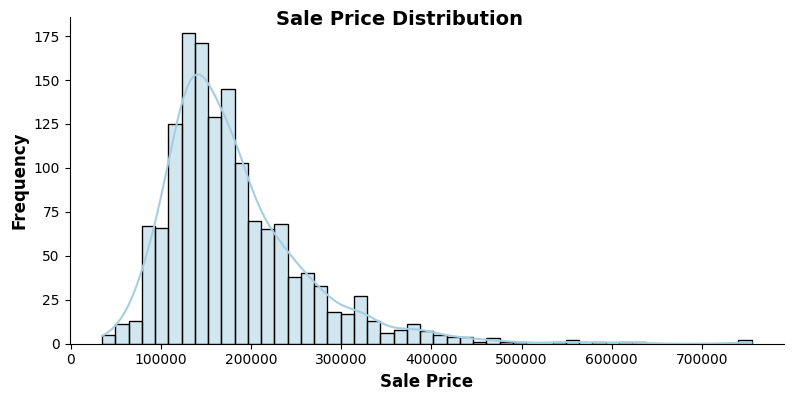

In [318]:
# Sale Price Distribution 
g = sns.displot(df['SalePrice'], kde=True, height=4, aspect=2)
g.figure.suptitle("Sale Price Distribution", fontsize=14, fontweight='bold', color='black')  
g.set_xlabels("Sale Price", fontsize=12, fontweight='bold', color='black')           
g.set_ylabels("Frequency", fontsize=12, fontweight='bold', color='black')               
plt.show()


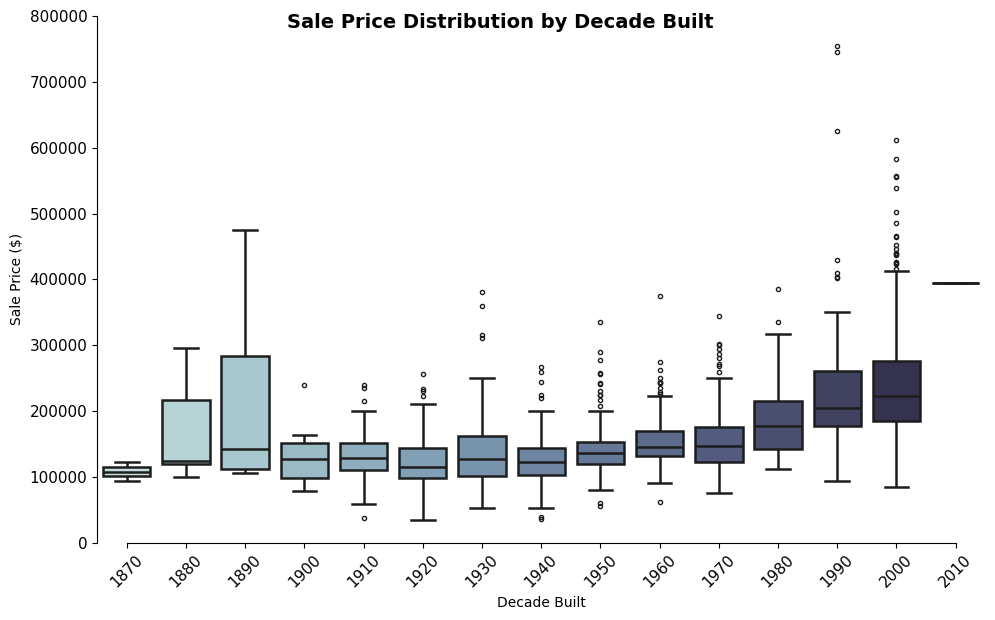

In [319]:
# Sale Price by Decade
 
num_decades = data['DecadeBuilt'].nunique()

g = sns.catplot(
    data=data,
    x="DecadeBuilt",
    y="SalePrice",
    hue="DecadeBuilt",
    kind="box",
    palette=sns.cubehelix_palette(num_decades, start=.2, rot=-.3),  
    height=6,         
    aspect=10/6,      
    linewidth=1.8,
    fliersize=3,
    legend=False
)

# Set y-axis limit
g.set(ylim=(0, 800000))

# Set axis labels 
g.set_axis_labels("Decade Built", "Sale Price ($)")

# Set plot title 
g.figure.suptitle("Sale Price Distribution by Decade Built", fontsize=14, fontweight='bold', color='black')

# Rotate x-axis labels
g.set_xticklabels(rotation=45, fontsize=11, color='black')
plt.yticks(fontsize=11, color='black')

sns.despine(trim=True)
plt.show()


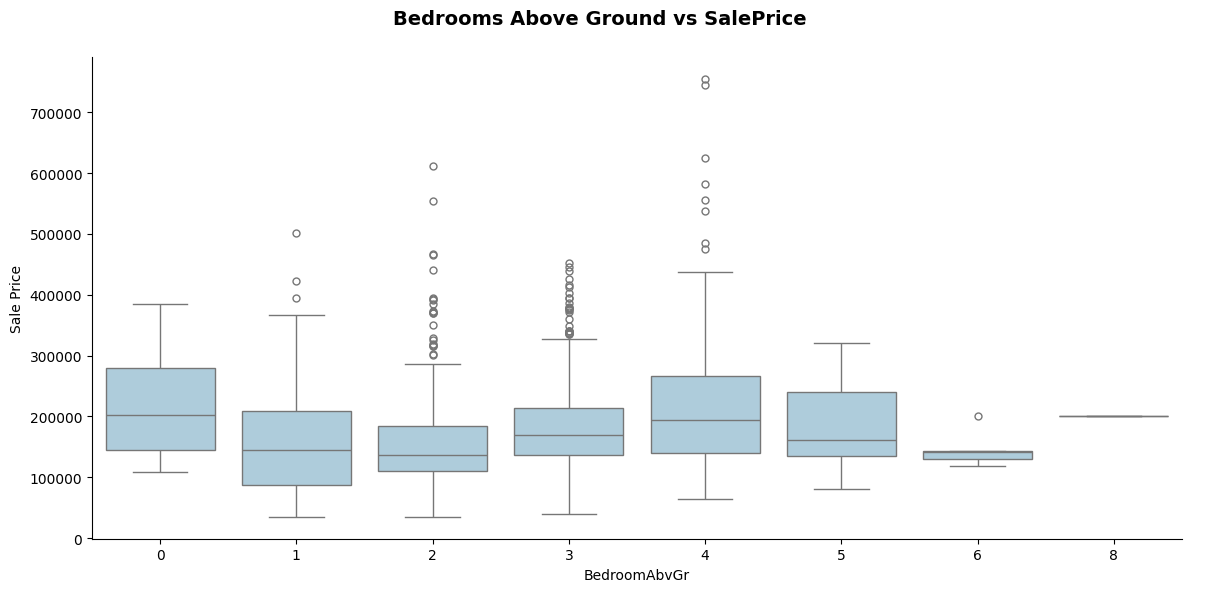

In [320]:
# Boxplot: BedroomAbvGr vs SalePrice 
g = sns.catplot(
    data=df,
    x="BedroomAbvGr",
    y="SalePrice",
    kind="box",

    height=6,         
    aspect=12/6       
)

g.set_axis_labels("BedroomAbvGr", "Sale Price")
g.figure.suptitle("Bedrooms Above Ground vs SalePrice", fontsize=14, fontweight='bold', color='black')

# Adjust the title position 
g.figure.subplots_adjust(top=0.9)

plt.show()


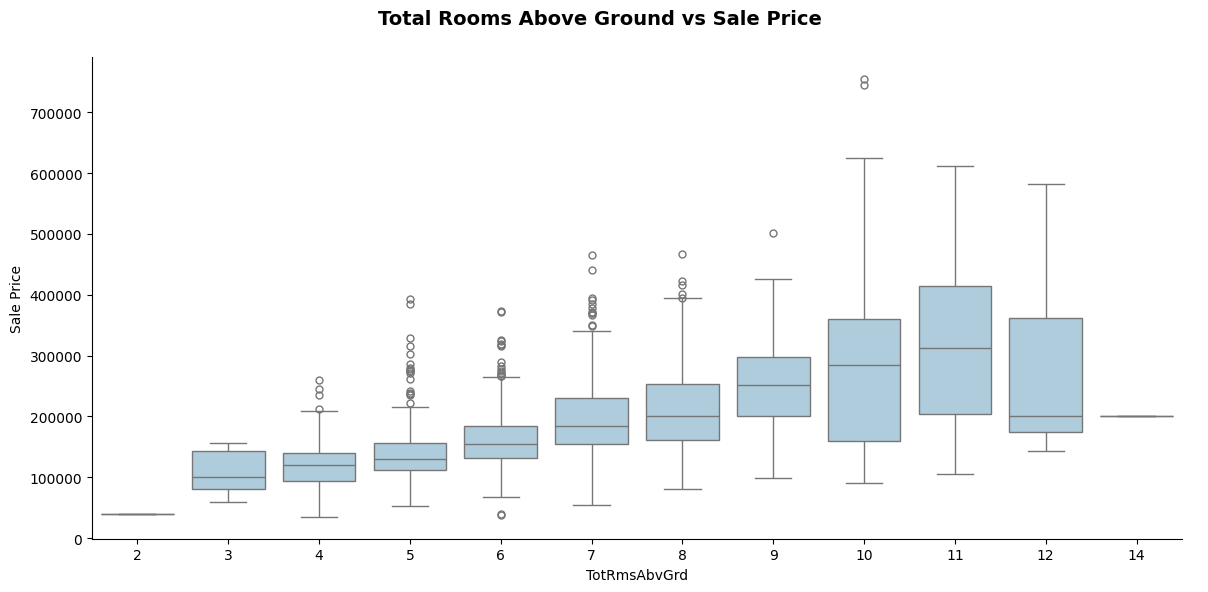

In [321]:

g = sns.catplot(
    data=df,
    x="TotRmsAbvGrd",
    y="SalePrice",
    kind="box",

    height=6,       
    aspect=12/6     
)

g.set_axis_labels("TotRmsAbvGrd", "Sale Price")
g.figure.suptitle("Total Rooms Above Ground vs Sale Price", fontsize=14, fontweight='bold', color='black')

# Adjust the title position 
g.figure.subplots_adjust(top=0.9)

plt.show()


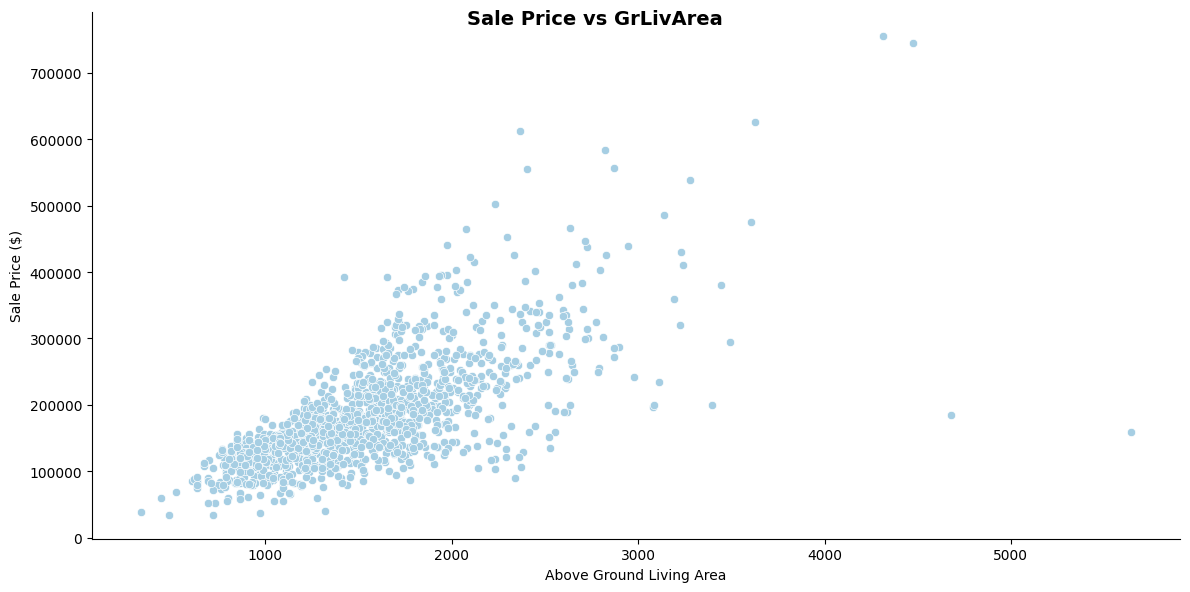

In [322]:
# Sale Price vs. GrLivArea
g = sns.relplot(
    data=df,
    x="GrLivArea",
    y="SalePrice",
    kind="scatter",
    height=6,             
    aspect=12/6,            

)
g.figure.suptitle("Sale Price vs GrLivArea", fontsize=14, fontweight='bold', color='black')
g.set_axis_labels("Above Ground Living Area", "Sale Price ($)")
plt.show()


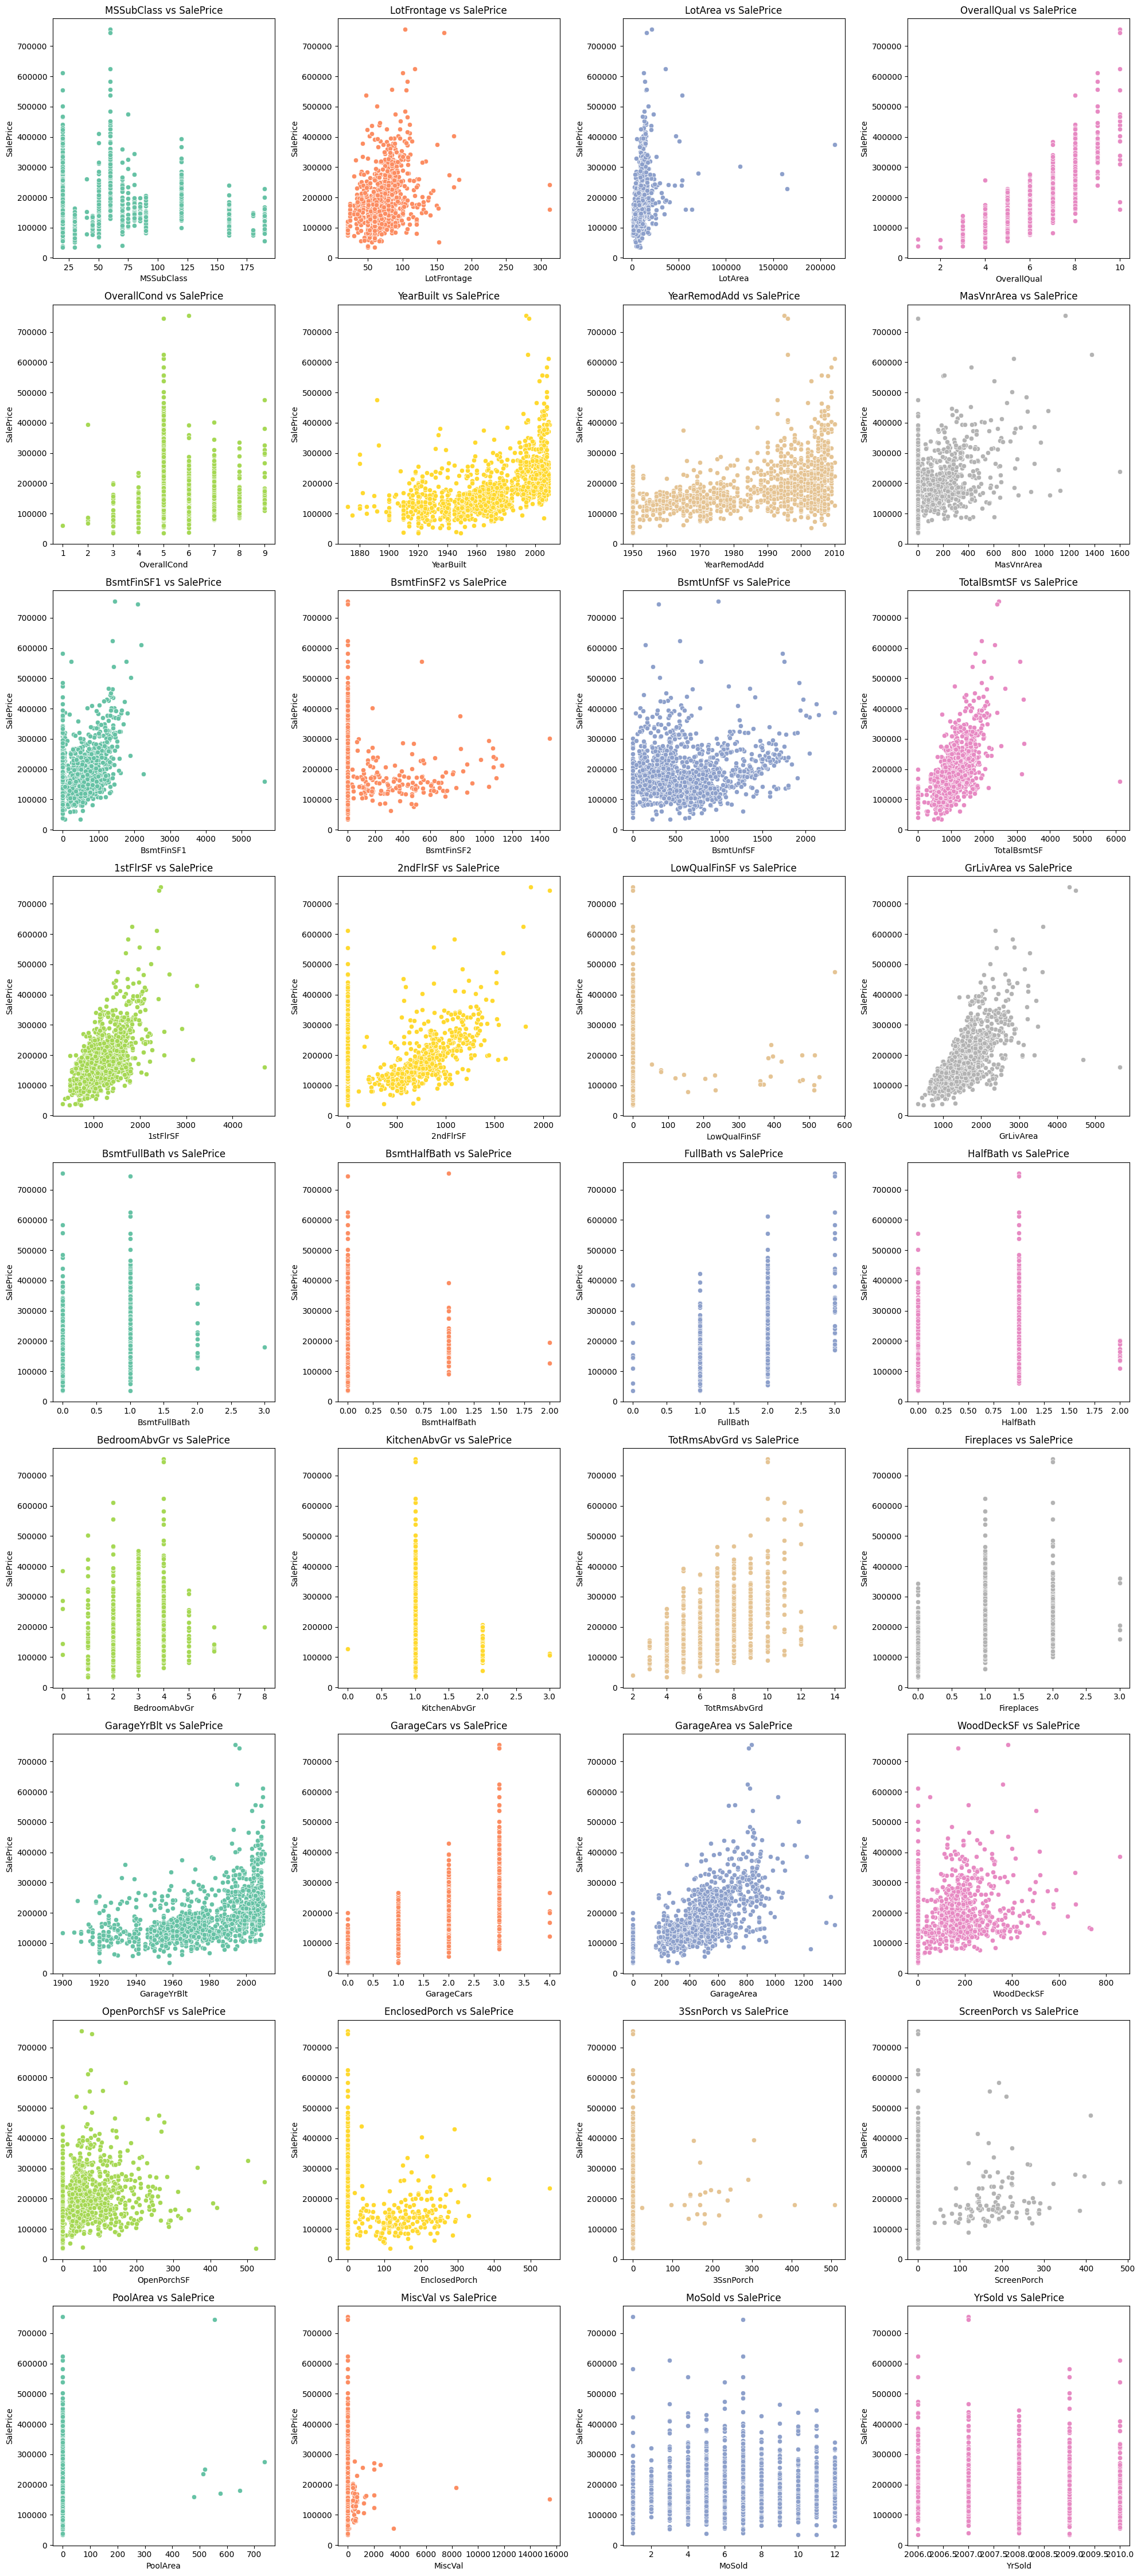

In [323]:
# Scatter plots for continuous variables vs. SalePrice
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Exclude 'SalePrice' since it is used as the target variable
if 'SalePrice' in numeric_columns:
    numeric_columns.remove('SalePrice')

total_numeric = len(numeric_columns)
columns_per_row = 4
total_rows = math.ceil(total_numeric / columns_per_row)

# Subplots
fig, axes = plt.subplots(total_rows, columns_per_row, figsize=(20, 5 * total_rows))
axes = axes.flatten()

# Individual scatter plots
for i, col in enumerate(numeric_columns):
    sns.scatterplot(x=col, y='SalePrice', data=df, ax=axes[i], color=scatter_colors[i])
    axes[i].set_title(f'{col} vs SalePrice', fontsize=12)
    axes[i].set_xlabel(col, fontsize=10)
    axes[i].set_ylabel('SalePrice', fontsize=10)

for j in range(total_numeric, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
